In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

#  10nano

In [4]:
modulation = 93 #Hz
loop_number = 50000    
res = 1/2972160000

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [5]:
sam

336

In [6]:
sr

3124800000

In [7]:
interval = segment_length*1e9 #nano
interval

107.52688172043011

# AWG and Pulse files setup

In [2]:
AWG_Settings_10nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3124800000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10nano'
}

In [3]:
M8190A = VisaR(AWG_Settings_10nano,60000)

In [8]:
M8190A.write('FREQ:RAST {a}'.format(a = sr))

21

In [ ]:
Initialization(M8190A,AWG_Settings_10nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [9]:
Pump_10nano = {
    'Name':'Pump_10nano',
    'Amplitude': 2*150,
    'Start time':50,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_10nano = {
    'Name':'ProbeA_10nano',
    'Amplitude':2*50,
    'Start time':30,
    'End time':70,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_10nano= {
    'Name':'ProbeB_10nano',
    'Amplitude':-2*50,
    'Start time':30,
    'End time':70,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [12]:
ProbeB_10nano_empty= {
    'Name':'ProbeB_10nano_empty',
    'Amplitude':0*50,
    'Start time':30,
    'End time':70,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [13]:
PulseScheme_A_10nano =  {
    'Name' : 'PulseScheme_A_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeA_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [14]:
PulseScheme_B_10nano =  {
    'Name' : 'PulseScheme_B_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeB_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [15]:
PulseScheme_B_10nano_empty =  {
    'Name' : 'PulseScheme_B_10nano',
    'Pulse Scheme': [ProbeB_10nano_empty,ProbeB_10nano_empty],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

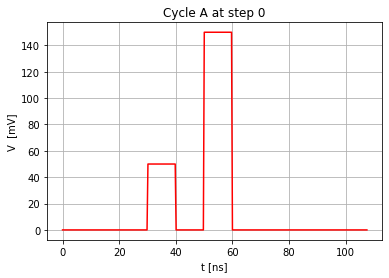

In [76]:
step = 0
pul1 = Sweep_dir_noteil(PulseScheme_A_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano 93 Hz mod ,{a} step.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

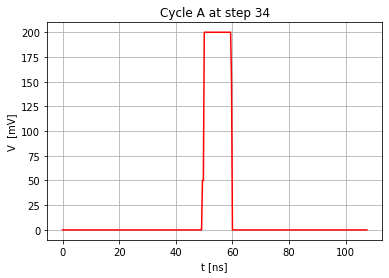

In [44]:
step = 34
pul1 = Sweep_dir_noteil(PulseScheme_A_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano 93 Hz mod , {a} step.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

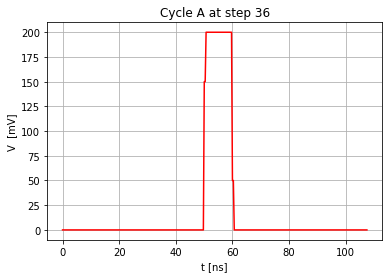

In [45]:
step = 36
pul1 = Sweep_dir_noteil(PulseScheme_A_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano 93 Hz mod , {a} step.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

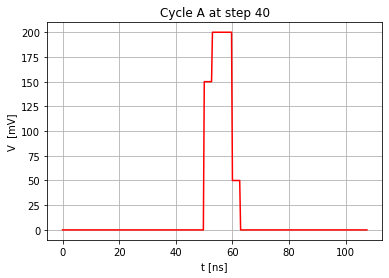

In [53]:
step = 40
pul1 = Sweep_dir_noteil(PulseScheme_A_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano 93 Hz mod , {a} step.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

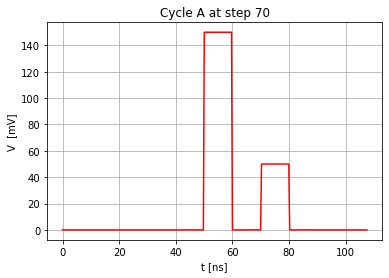

In [30]:
step = 70
pul1 = Sweep_dir_noteil(PulseScheme_A_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano 93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

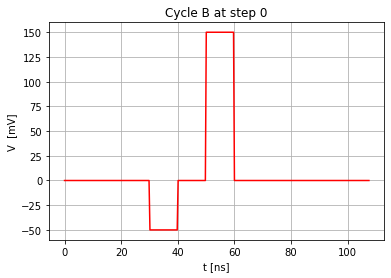

In [31]:
step = 0
pul1 = Sweep_dir_noteil(PulseScheme_B_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 10nano 93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

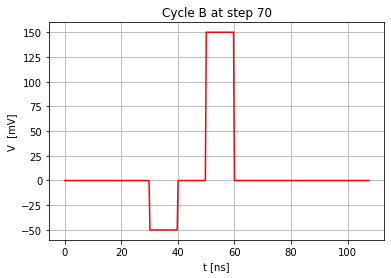

In [21]:
step = 70
pul1 = Sweep_dir_noteil(PulseScheme_B_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle B, Probe width 10nano 93 Hz mod {a} step.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

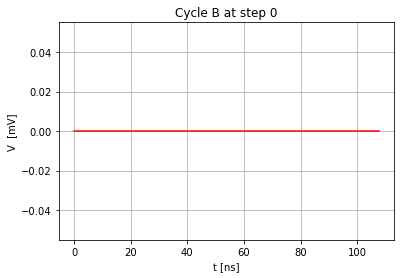

In [33]:
step = 0
pul1 = Sweep_dir_noteil(PulseScheme_B_10nano_empty,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 50 nano 93 Hz mod {a} step empty .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step),bbox_inches='tight')

In [21]:
sweeping_run_a_10nano = Sweeping_Single_List_File_teil(PulseScheme_A_10nano,70,interval,sam,0,70,AWG_Settings_10nano,'A')[0]

In [22]:
sweeping_run_b_10nano = Sweeping_Single_List_File_teil(PulseScheme_B_10nano,70,interval,sam,0,70,AWG_Settings_10nano,'B')[0]

In [23]:
#Exporting pickle

with open(r"{dict}\cycleA_71steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10nano, k)


with open(r"{dict}\cycleB_71steps_93Hz_10nano_.p".format(dict = PulseScheme_B_10nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10nano, h)

In [53]:
AWG_Settings_10nano_empty= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':2999808000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the SMA outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10nano\empty B cycle'
}

In [54]:
sweeping_run_b_10nano_empty = Sweeping_Single_List_File_teil(PulseScheme_B_10nano_empty,70,interval,sam,0,70,AWG_Settings_10nano_empty,'B')[0]

In [55]:
#Exporting pickle

with open(r"{dict}\cycleB_71steps_93Hz_10nano_empty.p".format(dict = PulseScheme_B_10nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10nano_empty, h)

In [16]:
#Importing Pickle

with open(r"{dict}\cycleA_71steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as j:
    sweeping_runa_10nano = pickle.load(j)

with open(r"{dict}\cycleB_71steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as f:
    sweeping_runb_10nano= pickle.load(f)

In [20]:
sweeping_runa_10nano

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\10nano\\SegmentA_336_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\10nano\\SegmentA_336_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\10nano\\SegmentA_336_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\10nano\\SegmentA_336_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\10nano\\SegmentA_336_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\10nano\\SegmentA_336_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\10nano\\SegmentA_336_6.csv',

In [ ]:
sweeping_run_b_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
loop_10nano

8000

In [24]:
Sequence_File(M8190A,sweeping_run_a_10nano['Pulse File Location, at step 70'],sweeping_run_b_10nano['Pulse File Location, at step 70'],loop_number)

Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND


0

# Loading

In [17]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [43]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '50 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '93Hz'
}

In [44]:
loop_number

50000

In [79]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10nano,sweeping_run_b_10nano,PulseScheme_A_10nano['Measurement file Path'],Lock_In_Settings,loop_number)

Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 0 is 1.191997493978081 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 1 is 1.191979452684489 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 2 is 1.1919349602234839 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 3 is 1.1920181662936649 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 4 is 1.1920032728299506 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,

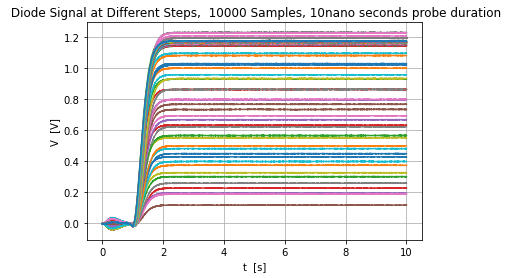

In [80]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10nano seconds probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 100nano ,71 steps, 93 Hz no legend, .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [81]:
time_delay = np.linspace(-20,20,71)

In [ ]:
%matplotlib widget

In [41]:
1/8e9

1.25e-10

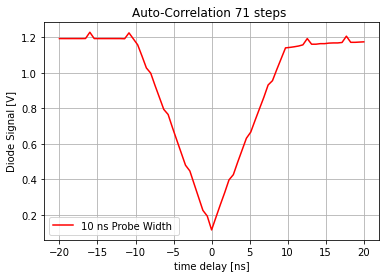

In [82]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10 ns Probe Width ',color='red')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 71 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps 10nano 93Hz length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [ ]:
100,
50,
25
10